In [1]:
import torch
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
import numpy as np

In [33]:
class my_net(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, num_classes: int):
        super(my_net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        out1 = self.fc1(x)
        out2 = self.active_func(out1)
        out = self.fc2(out2)
        out = self.active_func(out)
        return out

    def active_func(self, x):
        return torch.relu(x)


In [29]:
# 设置随机种子以便复现
torch.manual_seed(6)
np.random.seed(6)

def generate_data( N:int )->Tensor:
    x = torch.linspace(1, 16, N).unsqueeze(1)  # 生成N个在[1, 16]范围内均匀分布的点作为x
    y = torch.log2(x) + torch.cos(torch.tensor(np.pi/2) * x)  # 计算对应的y值
    return x, y
def split_dataset(x : Tensor, y : Tensor, train_ratio = 0.8, val_ratio = 0.1, test_ratio = 0.1):
    total_size = x.size(0)
    train_size = int(total_size * train_ratio)
    val_size = int(total_size * val_ratio)
    test_size = total_size - train_size - val_size
    # 打乱数据集
    indices = torch.randperm(total_size)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:(train_size + val_size)]
    test_indices = indices[(train_size + val_size):]
    # 返回划分后的数据集
    return x[train_indices,:], y[train_indices,:], x[val_indices,:], y[val_indices,:], \
                                                x[test_indices,:], y[test_indices,:]

# 设置数据量
N_values = [200, 2000, 10000]

# 生成和划分数据集
datasets = {}
N = N_values[0]
x, y = generate_data(N)
train_x,train_y, val_x, val_y, test_x, test_y = split_dataset(x, y)

print(train_x.size())

torch.Size([160, 1])


In [30]:
# hyperparameters
input_size = x.size()[1]
output_size = y.size()[1]
hidden_size = 500

learning_rate = 0.001
num_epochs =500

model  = my_net(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [31]:
# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_x)
    loss = criterion(outputs, train_y)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


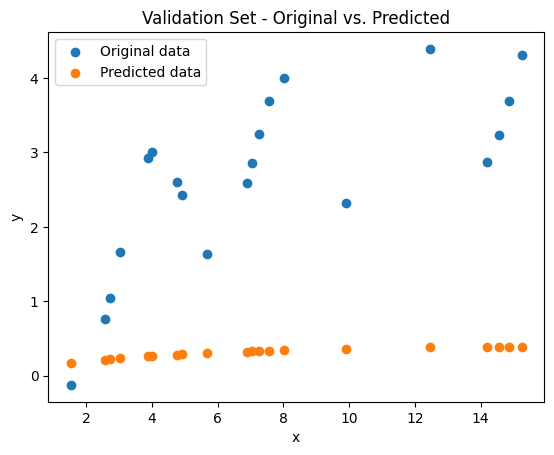

MSE: 6.7365217208862305


In [32]:
import matplotlib.pyplot as plt

def visualize_validation_set(val_y, pred_y, x_range):
    val_y = val_y.squeeze(1).detach().numpy()
    pred_y = pred_y.squeeze(1).detach().numpy()
    plt.scatter(x_range, val_y, label='Original data')
    plt.scatter(x_range, pred_y, label='Predicted data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Validation Set - Original vs. Predicted')
    plt.legend()
    plt.show()

# Visualize the validation set
val_y_pred = model(val_x)
visualize_validation_set(val_y, val_y_pred, val_x)
mse_score = torch.mean((val_y_pred - val_y)**2)
print('MSE:', mse_score.item())